In [20]:
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Afhamfardeen98\AppData\Roaming\nltk_data...


True

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [4]:
sid=SentimentIntensityAnalyzer()

In [6]:
a='This is a good movie'
sid.polarity_scores(a)

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

In [7]:
a="This is the best,most awesome movie EVER MADE!!!"
sid.polarity_scores(a)

{'neg': 0.0, 'neu': 0.585, 'pos': 0.415, 'compound': 0.7163}

In [8]:
a='good'
sid.polarity_scores(a)

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404}

In [9]:
a="This is the worst movie,I habe EVER seen."
sid.polarity_scores(a)

{'neg': 0.369, 'neu': 0.631, 'pos': 0.0, 'compound': -0.6249}

In [14]:
df=pd.read_csv('../UPDATED_NLP_COURSE/TextFiles/amazonreviews.tsv',sep='\t')
df.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [16]:
df.isnull().sum()

label     0
review    0
dtype: int64

In [18]:
df['label'].unique()

array(['pos', 'neg'], dtype=object)

In [19]:
df['label'].value_counts()

neg    5097
pos    4903
Name: label, dtype: int64

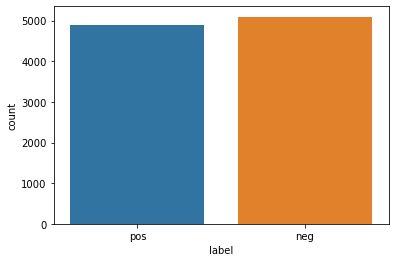

In [21]:
sns.countplot(df['label'])

In [35]:
df.iloc[0]['review']

'Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'

In [36]:
print(df.iloc[0]['label'])
sid.polarity_scores(df.iloc[0]['review'])

pos


{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'compound': 0.9454}

In [29]:
blank=[]
for i,rev,lab in df.itertuples():
    if type(rev) == str:
        if rev.isspace():
            blank.append(i)

In [30]:
blank

[]

In [31]:
df.drop(blank,inplace=True)

In [38]:
sid.polarity_scores(df.iloc[0]['review'])['compound']

0.9454

In [39]:
df['Scores']=df['review'].apply(lambda review: sid.polarity_scores(review))

In [40]:
df.head()

,label,review,Scores
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co..."
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co..."
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com..."
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com..."
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp..."


In [41]:
df['Scores'].head()

0    {'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...
1    {'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...
2    {'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...
3    {'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...
4    {'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...
Name: Scores, dtype: object

In [44]:
df['compound']=df['Scores'].apply(lambda score: score['compound'])

In [45]:
df.head()

,label,review,Scores,compound
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",0.9454
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",0.8957
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",0.9858
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...",0.9814
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.9781


In [48]:
lst=[]
for i,lab,rev,score,comp in df.itertuples():
    if (comp > 0 and lab == 'neg') or (comp < 0 and lab == 'pos'):
        lst.append(i)

In [51]:
df.iloc[lst[0]]

label                                                     neg
review      Oh please: I guess you have to be a romance no...
Scores      {'neg': 0.077, 'neu': 0.723, 'pos': 0.199, 'co...
compound                                               0.9097
Name: 13, dtype: object

In [54]:
print(len(lst)/len(df))

0.2822


In [56]:
df['comp_score']=df['compound'].apply(lambda c : 'pos' if c>0 else 'neg')

In [57]:
df.head()

,label,review,Scores,compound,comp_score
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",0.9454,pos
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",0.8957,pos
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",0.9858,pos
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...",0.9814,pos
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.9781,pos


In [58]:
df[df['label']!=df['comp_score']]

,label,review,Scores,compound,comp_score
13,neg,Oh please: I guess you have to be a romance no...,"{'neg': 0.077, 'neu': 0.723, 'pos': 0.199, 'co...",0.9097,pos
19,neg,sizes recomended in the size chart are not rea...,"{'neg': 0.0, 'neu': 0.935, 'pos': 0.065, 'comp...",0.4926,pos
20,neg,mens ultrasheer: This model may be ok for sede...,"{'neg': 0.134, 'neu': 0.696, 'pos': 0.17, 'com...",0.6318,pos
22,neg,Another Abysmal Digital Copy: Rather than scra...,"{'neg': 0.037, 'neu': 0.819, 'pos': 0.145, 'co...",0.9667,pos
28,neg,Oh dear: I was excited to find a book ostensib...,"{'neg': 0.047, 'neu': 0.839, 'pos': 0.114, 'co...",0.6486,pos
...,...,...,...,...,...
9982,neg,great movie massacred by tape quality: One of ...,"{'neg': 0.0, 'neu': 0.819, 'pos': 0.181, 'comp...",0.8591,pos
9988,pos,Frightening movie with superb acting by Sir Ho...,"{'neg': 0.132, 'neu': 0.771, 'pos': 0.097, 'co...",-0.6908,neg
9992,neg,The Silence of the Dummies: This is overall a ...,"{'neg': 0.064, 'neu': 0.793, 'pos': 0.143, 'co...",0.8890,pos
9994,neg,"Sorry Jim: As a former realtor, Mr. Cole owes ...","{'neg': 0.075, 'neu': 0.749, 'pos': 0.176, 'co...",0.9066,pos


In [69]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split

In [65]:
confusion_matrix(df['label'],df['comp_score'])

array([[2709, 2388],
       [ 489, 4414]], dtype=int64)

In [66]:
accuracy_score(df['label'],df['comp_score'])

0.7123

In [68]:
print(classification_report(df['label'],df['comp_score']))

              precision    recall  f1-score   support

         neg       0.85      0.53      0.65      5097
         pos       0.65      0.90      0.75      4903

    accuracy                           0.71     10000
   macro avg       0.75      0.72      0.70     10000
weighted avg       0.75      0.71      0.70     10000



In [71]:
X_train,X_test,y_train,y_test=train_test_split(df['review'],df['label'],test_size=0.33,random_state=101)

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

text_clf=Pipeline([('tfid',TfidfVectorizer()),('clf',LinearSVC())],verbose=1)
text_clf.fit(X_train,y_train)

[Pipeline] .............. (step 1 of 2) Processing tfid, total=   2.2s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.3s


Pipeline(steps=[('tfid', TfidfVectorizer()), ('clf', LinearSVC())], verbose=1)

In [74]:
predictions=text_clf.predict(X_test)

In [76]:
confusion_matrix(y_test,predictions)

array([[1451,  217],
       [ 228, 1404]], dtype=int64)

In [77]:
accuracy_score(y_test,predictions)

0.8651515151515151

In [79]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         neg       0.86      0.87      0.87      1668
         pos       0.87      0.86      0.86      1632

    accuracy                           0.87      3300
   macro avg       0.87      0.87      0.87      3300
weighted avg       0.87      0.87      0.87      3300

